# Importing the libraries

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Wordcloud
from wordcloud import wordcloud


nltk.download('stopwords')
nltk.download('wordnet')

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

# Import the dataset

Link: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/archive/train.txt',delimiter=';', names=['text','label'])
df_val = pd.read_csv('/content/drive/MyDrive/Datasets/archive/val.txt', delimiter=';', names=['text','label'])

In [ ]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
df = pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.tail()

,text,label
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [ ]:
df.shape

(18000, 2)

In [ ]:
df.sample(5)

,text,label
5411,i spray it all over my body during afternoons ...,sadness
6366,im feeling pleased and glad that other people ...,joy
16260,i am feeling so invigorated and so ready to ke...,joy
7268,i feel a bit strange publishing these beautifu...,fear
15173,i hate the fact i feel so miserable most of th...,sadness


In [ ]:
df.head(2)

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness


In [ ]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

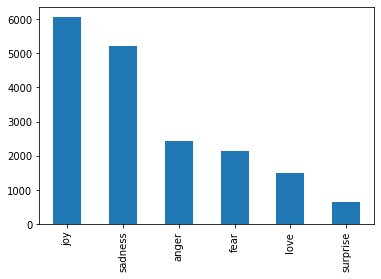

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
# Positive Sentiments - Joy, Love, Surprise - 1
# Negative Sentiments - Anger, Sadness, Fear - 0

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df['label'].replace(to_replace=['surprise', 'joy', 'love'], value=1, inplace=True)
df['label'].replace(to_replace=['anger', 'sadness','fear'], value=0, inplace=True)

In [ ]:
df.head(10)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,1
7,i feel as confused about life as a teenager or...,0
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,1


In [ ]:
df.label.value_counts()

0    9799
1    8201
Name: label, dtype: int64

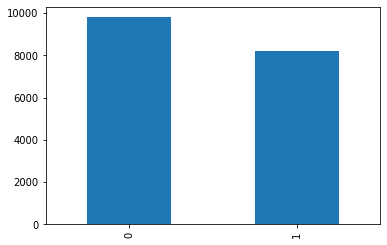

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


* Lemmatizer: https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
def tranformation(df_column):
  output = []
  for i in df_column:
    new_text = re.sub('[^a-zA-Z]',' ',str(i))
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
    output.append(' '.join(str(k) for k in new_text))
  
  return output


In [ ]:
var = tranformation(df.text)

In [ ]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [ ]:
from wordcloud import WordCloud

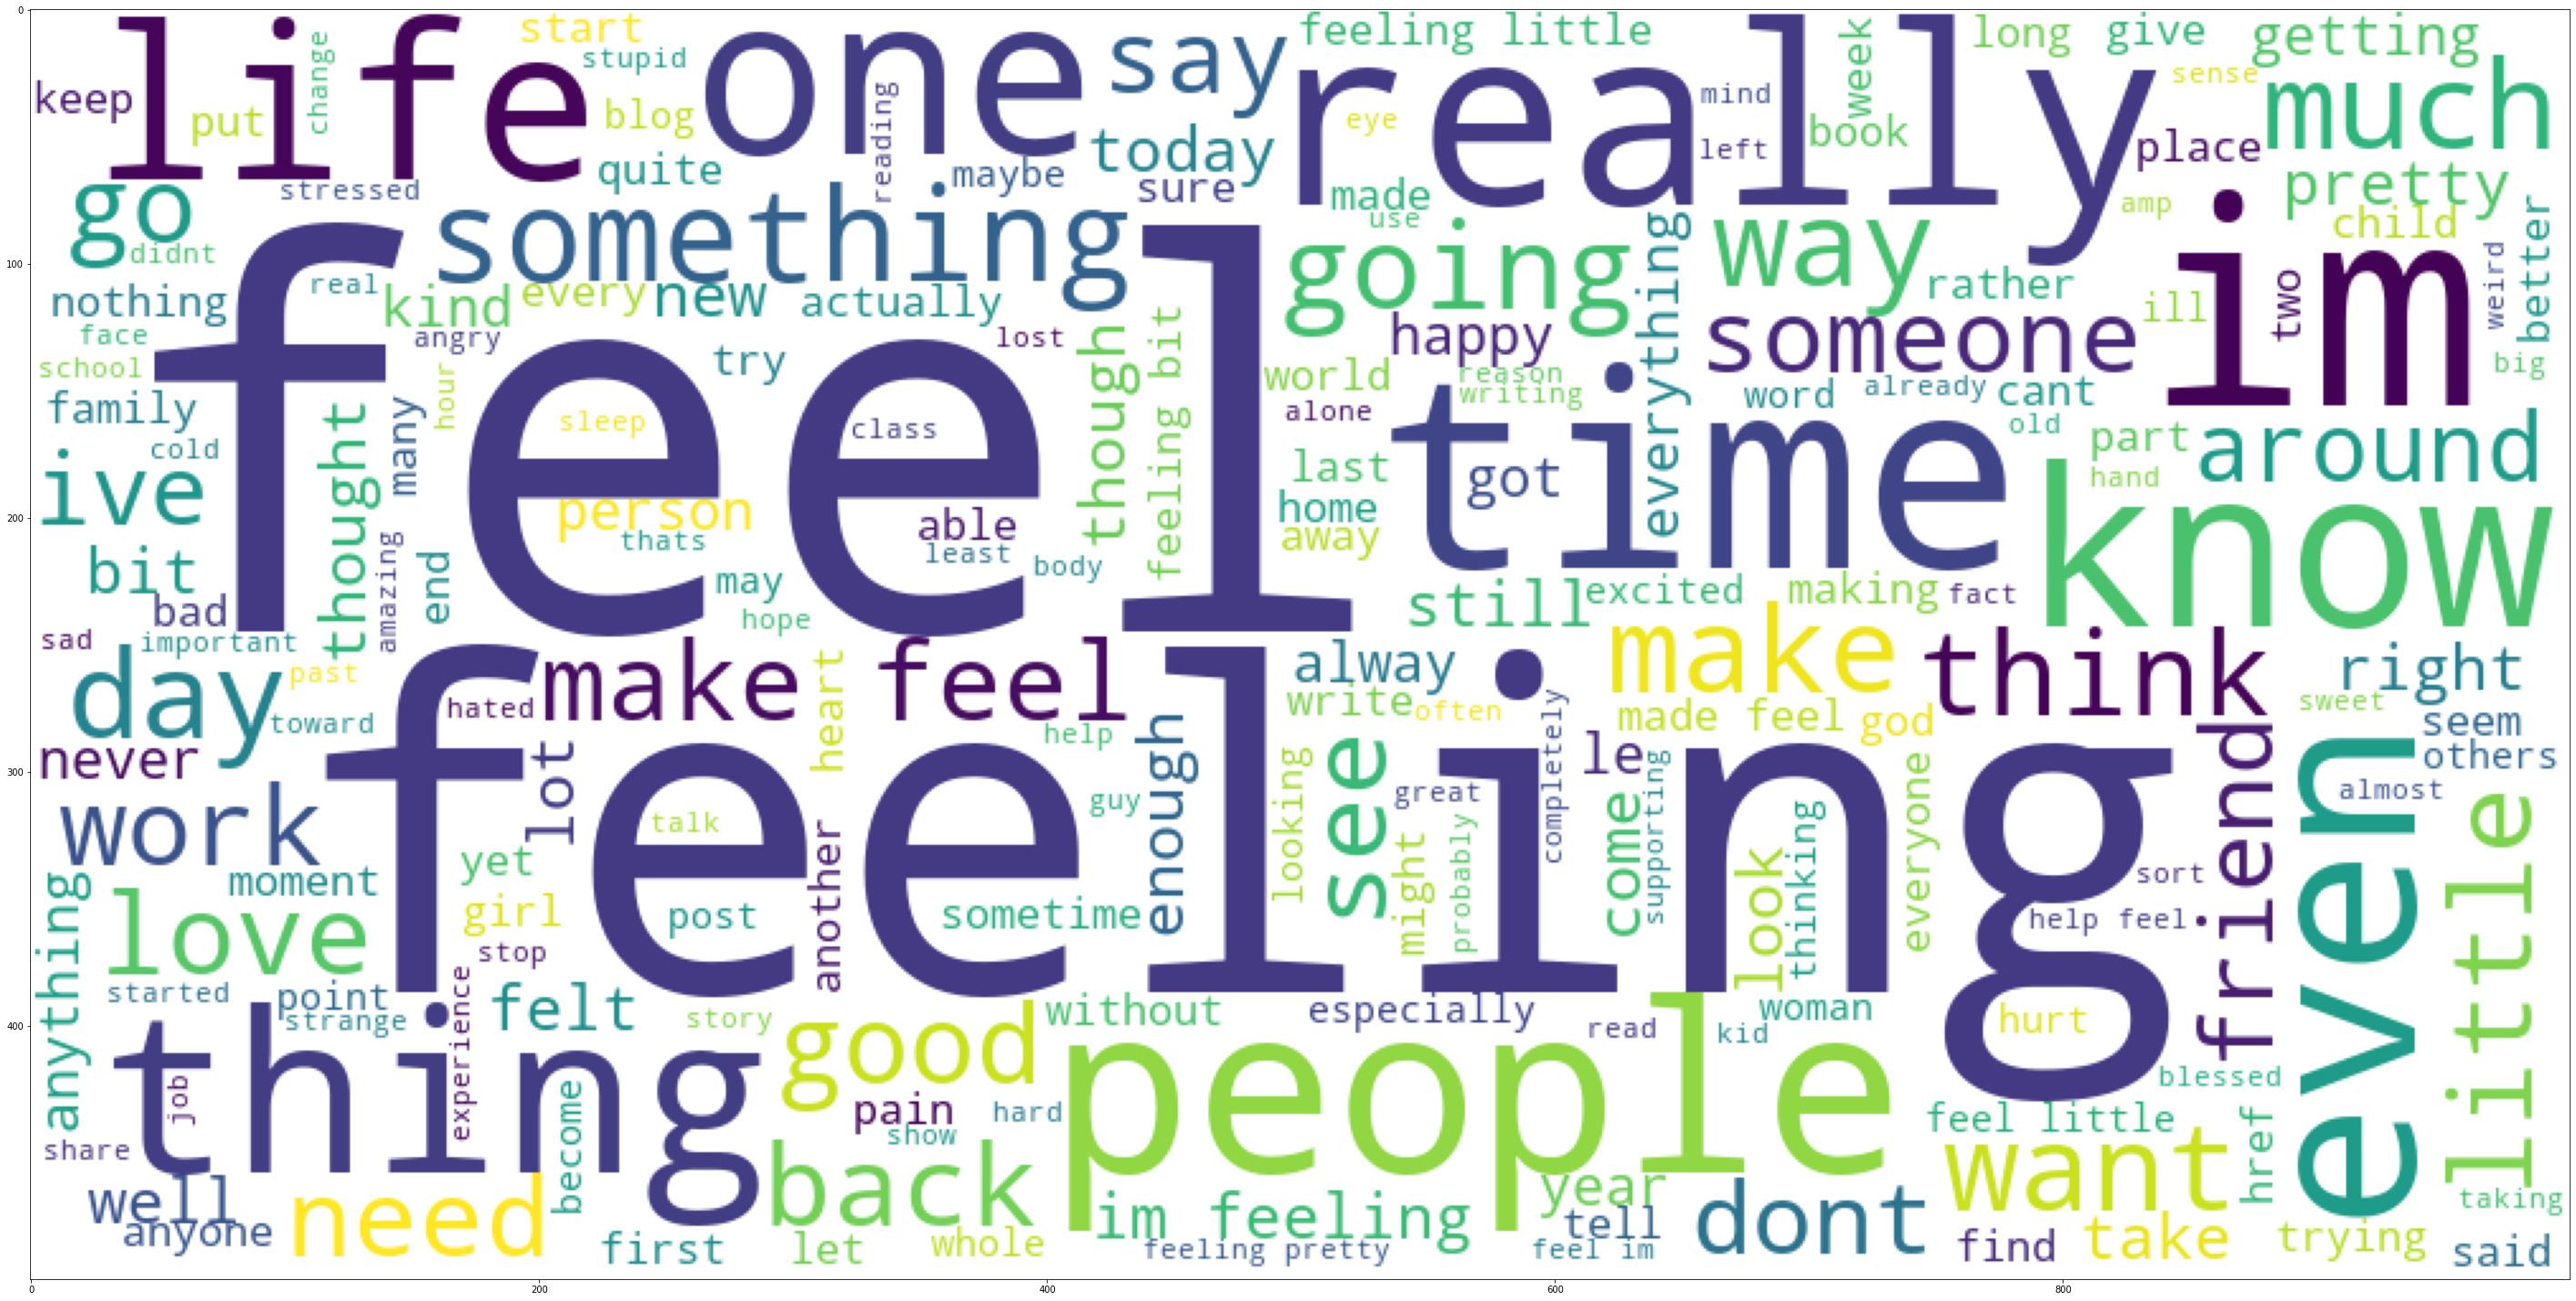

In [ ]:
# Word Cloud
plt.figure(figsize=(50,28))
word = ''
for i in var:
  for j in i:
    word += " ".join(j)

wc = WordCloud(width=1000, height= 500, background_color='white', min_font_size=10).generate(word)
plt.imshow(wc)

In [ ]:
# Bag of Words model (BOW)

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(var)
X_train = traindata
y_train = df.label

In [ ]:
X_train

<18000x117594 sparse matrix of type '<class 'numpy.int64'>'
	with 311217 stored elements in Compressed Sparse Row format>

In [ ]:
model = RandomForestClassifier()

In [ ]:
# Hyper Parameter Tuning

parameters = {'max_features':('auto', 'sqrt'),
              'n_estimators': [500, 1000, 1500],
              'max_depth': [5,10, None],
              'min_samples_leaf':[1, 2, 5, 10],
              'min_samples_split':[5, 10, 15],
              'bootstrap':[True, False]}

In [ ]:
parameters

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ('auto', 'sqrt'),
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [500, 1000, 1500]}

In [ ]:
grid_search = GridSearchCV(model, 
                           parameters, 
                           cv=5,
                           return_train_score = True,
                           n_jobs=1)

In [ ]:
grid_search.fit(X_train, y_train)

In [43]:
grid_search.best_params_

AttributeError: ignored

In [44]:
rfc = RandomForestClassifier(max_features= grid_search.best_params_['max_features'],
                             n_estimators= grid_search.best_params_['n_estimators'],
                             max_depth= grid_search.best_params_['max_depth'],
                             min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
                             min_samples_split= grid_search.best_params_['min_samples_split'],
                             bootstrap= grid_search.best_params_['bootstrap'])

AttributeError: ignored

In [45]:
rfc.fit(X_train, y_train)

NameError: ignored

In [46]:
test_data = 
X_test, y_test

SyntaxError: ignored

In [47]:
y_pred = rfc.predict(X_test)

NameError: ignored

In [48]:
# Model Evaluation
accuracy_score(y_test, y_pred)

NameError: ignored

In [49]:
def sentimental_analysis(input):
  new_input = tranformation(input)
  transformed_input = cv.transform(new_input)
  prediction = rfc.predict(transformed_input)
  if prediction == 0:
    print('Negative Sentiment')
  elif prediction == 1:
    print('Positive Sentiment')
  else:
    print('Invalid Sentiment')

In [50]:
input = "Today I was playing in the park and I fell"
inp = input("")

TypeError: ignored

In [51]:
sentimental_analysis(inp)

NameError: ignored